In [95]:
# Import relevant modules

import numpy as np
import pandas as pd
import pandas_datareader as web
import seaborn as sns
import copy

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
# Define a method for downloading relevant data

stocks = pd.read_csv('sp_500_stocks.csv') # I have a CSV file will all s&p 500 tickers saved
def datadownloader(u='2020-04-01', f='2022-04-01'):
    '''
    Downloads historical data for all stocks in S&P500 from Yahoo Finance API for the period between i and f.
    Not all stocks' data is downloaded everytime due to issue with the API.
    '''
    dct = {}
    ticker = 0
    for i in stocks['Ticker']:
        ticker = ticker + 1
        try:
            dct['%s' % i] = web.DataReader(f'{i}', data_source='yahoo',  start=u, end=f)
            print(f'{i} yahoo approved {ticker}')
        except:
            print(f'{i} yahoo disapproved {ticker}')
            pass
        
    return dct

In [9]:
# Collect the relevant data across the 5 time periods

dct20_22 = datadownloader()
dct18_20 = datadownloader('2018-01-01','2020-01-01')
dct12_14 = datadownloader('2012-01-01','2014-01-01')
dct08_10 = datadownloader('2008-01-01','2010-01-01')
dct05_07 = datadownloader('2005-01-01','2007-01-01')

A yahoo approved 1
AAL yahoo approved 2
AAP yahoo approved 3
AAPL yahoo approved 4
ABBV yahoo approved 5
ABC yahoo approved 6
ABMD yahoo approved 7
ABT yahoo approved 8
ACN yahoo approved 9
ADBE yahoo approved 10
ADI yahoo approved 11
ADM yahoo approved 12
ADP yahoo approved 13
ADSK yahoo approved 14
AEE yahoo approved 15
AEP yahoo approved 16
AES yahoo approved 17
AFL yahoo approved 18
AIG yahoo approved 19
AIV yahoo approved 20
AIZ yahoo approved 21
AJG yahoo approved 22
AKAM yahoo approved 23
ALB yahoo approved 24
ALGN yahoo approved 25
ALK yahoo approved 26
ALL yahoo approved 27
ALLE yahoo approved 28
ALXN yahoo disapproved 29
AMAT yahoo approved 30
AMCR yahoo approved 31
AMD yahoo approved 32
AME yahoo approved 33
AMGN yahoo approved 34
AMP yahoo approved 35
AMT yahoo approved 36
AMZN yahoo approved 37
ANET yahoo approved 38
ANSS yahoo approved 39
ANTM yahoo approved 40
AON yahoo approved 41
AOS yahoo approved 42
APA yahoo approved 43
APD yahoo approved 44
APH yahoo approved 45
AP

OXY yahoo approved 358
PAYC yahoo approved 359
PAYX yahoo approved 360
PBCT yahoo disapproved 361
PCAR yahoo approved 362
PEAK yahoo approved 363
PEG yahoo approved 364
PEP yahoo approved 365
PFE yahoo approved 366
PFG yahoo approved 367
PG yahoo approved 368
PGR yahoo approved 369
PH yahoo approved 370
PHM yahoo approved 371
PKG yahoo approved 372
PKI yahoo approved 373
PLD yahoo approved 374
PM yahoo approved 375
PNC yahoo approved 376
PNR yahoo approved 377
PNW yahoo approved 378
PPG yahoo approved 379
PPL yahoo approved 380
PRGO yahoo approved 381
PRU yahoo approved 382
PSA yahoo approved 383
PSX yahoo approved 384
PVH yahoo approved 385
PWR yahoo approved 386
PXD yahoo approved 387
PYPL yahoo approved 388
QCOM yahoo approved 389
QRVO yahoo approved 390
RCL yahoo approved 391
RE yahoo approved 392
REG yahoo approved 393
REGN yahoo approved 394
RF yahoo approved 395
RHI yahoo approved 396
RJF yahoo approved 397
RL yahoo approved 398
RMD yahoo approved 399
ROK yahoo approved 400
ROL 

GWW yahoo approved 212
HAL yahoo approved 213
HAS yahoo approved 214
HBAN yahoo approved 215
HBI yahoo approved 216
HCA yahoo approved 217
HD yahoo approved 218
HES yahoo approved 219
HFC yahoo disapproved 220
HIG yahoo approved 221
HII yahoo approved 222
HLT yahoo approved 223
HOLX yahoo approved 224
HON yahoo approved 225
HPE yahoo approved 226
HPQ yahoo approved 227
HRB yahoo approved 228
HRL yahoo approved 229
HSIC yahoo approved 230
HST yahoo approved 231
HSY yahoo approved 232
HUM yahoo approved 233
HWM yahoo approved 234
IBM yahoo approved 235
ICE yahoo approved 236
IDXX yahoo approved 237
IEX yahoo approved 238
IFF yahoo approved 239
ILMN yahoo approved 240
INCY yahoo approved 241
INFO yahoo disapproved 242
INTC yahoo approved 243
INTU yahoo approved 244
IP yahoo approved 245
IPG yahoo approved 246
IPGP yahoo approved 247
IQV yahoo approved 248
IR yahoo approved 249
IRM yahoo approved 250
ISRG yahoo approved 251
IT yahoo approved 252
ITW yahoo approved 253
IVZ yahoo approved 25

BK yahoo approved 65
BKNG yahoo approved 66
BKR yahoo approved 67
BLK yahoo approved 68
BLL yahoo approved 69
BMY yahoo approved 70
BR yahoo approved 71
BRK.B yahoo disapproved 72
BSX yahoo approved 73
BWA yahoo approved 74
BXP yahoo approved 75
C yahoo approved 76
CAG yahoo approved 77
CAH yahoo approved 78
CARR yahoo disapproved 79
CAT yahoo approved 80
CB yahoo approved 81
CBOE yahoo approved 82
CBRE yahoo approved 83
CCI yahoo approved 84
CCL yahoo approved 85
CDNS yahoo approved 86
CDW yahoo approved 87
CE yahoo approved 88
CERN yahoo approved 89
CF yahoo approved 90
CFG yahoo disapproved 91
CHD yahoo approved 92
CHRW yahoo approved 93
CHTR yahoo approved 94
CI yahoo approved 95
CINF yahoo approved 96
CL yahoo approved 97
CLX yahoo approved 98
CMA yahoo approved 99
CMCSA yahoo approved 100
CME yahoo approved 101
CMG yahoo approved 102
CMI yahoo approved 103
CMS yahoo approved 104
CNC yahoo approved 105
CNP yahoo approved 106
COF yahoo approved 107
COG yahoo disapproved 108
COO yah

SO yahoo approved 417
SPG yahoo approved 418
SPGI yahoo approved 419
SRE yahoo approved 420
STE yahoo approved 421
STT yahoo approved 422
STX yahoo approved 423
STZ yahoo approved 424
SWK yahoo approved 425
SWKS yahoo approved 426
SYF yahoo disapproved 427
SYK yahoo approved 428
SYY yahoo approved 429
T yahoo approved 430
TAP yahoo approved 431
TDG yahoo approved 432
TDY yahoo approved 433
TEL yahoo approved 434
TFC yahoo approved 435
TFX yahoo approved 436
TGT yahoo approved 437
TIF yahoo disapproved 438
TJX yahoo approved 439
TMO yahoo approved 440
TMUS yahoo approved 441
TPR yahoo approved 442
TROW yahoo approved 443
TRV yahoo approved 444
TSCO yahoo approved 445
TSN yahoo approved 446
TT yahoo approved 447
TTWO yahoo approved 448
TWTR yahoo approved 449
TXN yahoo approved 450
TXT yahoo approved 451
TYL yahoo approved 452
UA yahoo disapproved 453
UAA yahoo approved 454
UAL yahoo approved 455
UDR yahoo approved 456
UHS yahoo approved 457
ULTA yahoo approved 458
UNH yahoo approved 459

KLAC yahoo approved 267
KMB yahoo approved 268
KMI yahoo disapproved 269
KMX yahoo approved 270
KO yahoo approved 271
KR yahoo approved 272
KSS yahoo approved 273
KSU yahoo disapproved 274
L yahoo approved 275
LB yahoo disapproved 276
LDOS yahoo approved 277
LEG yahoo approved 278
LEN yahoo approved 279
LH yahoo approved 280
LHX yahoo approved 281
LIN yahoo approved 282
LKQ yahoo approved 283
LLY yahoo approved 284
LMT yahoo approved 285
LNC yahoo approved 286
LNT yahoo approved 287
LOW yahoo approved 288
LRCX yahoo approved 289
LUV yahoo approved 290
LVS yahoo approved 291
LW yahoo disapproved 292
LYB yahoo disapproved 293
LYV yahoo approved 294
MA yahoo approved 295
MAA yahoo approved 296
MAR yahoo approved 297
MAS yahoo approved 298
MCD yahoo approved 299
MCHP yahoo approved 300
MCK yahoo approved 301
MCO yahoo approved 302
MDLZ yahoo approved 303
MDT yahoo approved 304
MET yahoo approved 305
MGM yahoo approved 306
MHK yahoo approved 307
MKC yahoo approved 308
MKTX yahoo approved 30

CSX yahoo approved 117
CTAS yahoo approved 118
CTL yahoo disapproved 119
CTSH yahoo approved 120
CTVA yahoo disapproved 121
CTXS yahoo approved 122
CVS yahoo approved 123
CVX yahoo approved 124
CXO yahoo disapproved 125
D yahoo approved 126
DAL yahoo disapproved 127
DD yahoo approved 128
DE yahoo approved 129
DFS yahoo disapproved 130
DG yahoo disapproved 131
DGX yahoo approved 132
DHI yahoo approved 133
DHR yahoo approved 134
DIS yahoo approved 135
DISCA yahoo disapproved 136
DISCK yahoo disapproved 137
DISH yahoo approved 138
DLR yahoo approved 139
DLTR yahoo approved 140
DOV yahoo approved 141
DOW yahoo disapproved 142
DPZ yahoo approved 143
DRE yahoo approved 144
DRI yahoo approved 145
DTE yahoo approved 146
DUK yahoo approved 147
DVA yahoo approved 148
DVN yahoo approved 149
DXC yahoo approved 150
DXCM yahoo approved 151
EA yahoo approved 152
EBAY yahoo approved 153
ECL yahoo approved 154
ED yahoo approved 155
EFX yahoo approved 156
EIX yahoo approved 157
EL yahoo approved 158
EMN

USB yahoo approved 464
V yahoo disapproved 465
VAR yahoo disapproved 466
VFC yahoo approved 467
VLO yahoo approved 468
VMC yahoo approved 469
VNO yahoo approved 470
VRSK yahoo disapproved 471
VRSN yahoo approved 472
VRTX yahoo approved 473
VTR yahoo approved 474
VZ yahoo approved 475
WAB yahoo approved 476
WAT yahoo approved 477
WBA yahoo approved 478
WDC yahoo approved 479
WEC yahoo approved 480
WELL yahoo approved 481
WFC yahoo approved 482
WHR yahoo approved 483
WM yahoo approved 484
WMB yahoo approved 485
WMT yahoo approved 486
WRB yahoo approved 487
WRK yahoo disapproved 488
WST yahoo approved 489
WU yahoo approved 490
WY yahoo approved 491
WYNN yahoo approved 492
XEL yahoo approved 493
XLNX yahoo disapproved 494
XOM yahoo approved 495
XRAY yahoo approved 496
XRX yahoo approved 497
XYL yahoo disapproved 498
YUM yahoo approved 499
ZBH yahoo approved 500
ZBRA yahoo approved 501
ZION yahoo approved 502
ZTS yahoo disapproved 503


In [179]:
# Establishing Methods and Building Models

def lagit(df,lags,ticker):
    '''
    > Adds a number of new columns to input dataframe that each have a returns columns shifted by the number of 
    days corresponding to the number of the column, up to number of 'lags'
    > Returns a list of new columns names
    '''
    names = []
    for i in range(1,lags+1):
        df[f'Lag_{i}_{ticker}'] = df[f'returns{ticker}'].shift(i)
        names.append(f'Lag_{i}_{ticker}')
    return names 

def data_prep(ticker,lags):
    '''
    > Prepares data for analysis by my model.
    > Finds the top 5 stocks most similar to stock of choice, calculates returns columns and corresponding lagit
    columns which are then all added to the original dataframe
    > Returns the altered dataframe with all the relevant columns needed by Linear Regression
    > Returns the list of new columns names
    '''
    myDict = copy.deepcopy(dct) # SUPER IMPORTANT
    stock = myDict[ticker]

    best_corr = corr_dataframe[ticker].nlargest(6)
    best_corr = pd.DataFrame(best_corr)
    best_tickers = list(best_corr.index)

    lagnames = []

    for i in best_tickers:
        stock[f'returns{i}'] = np.log(myDict[i].Close.pct_change()+1)
        lagnames.append([i for i in lagit(stock,lags,i)])

    lagnames = [item for sublist in lagnames for item in sublist]

    stock.dropna(inplace=True)
    
    return stock,lagnames

def mymodel(ticker=None,lags=5,plot=False):
    '''
    Uses Linear Regression to fit the model to lag returns for the given stock and the
    5 most hisotrically correlated stocks.
    '''
    df,features = data_prep(ticker,lags)
    
    model = LinearRegression()
    
    train,test = train_test_split(df, shuffle=False, test_size = 0.25, random_state = 0)
    model.fit(train[features],train[[f'returns{ticker}']])
    train = train.copy()
    test = test.copy()
    
    test['predLR'] = model.predict(test[features])
    test['predDirection'] = [1 if i>0 else -1 for i in test.predLR]
    test['actualDirection'] = [1 if i>0 else -1 for i in test[f'returns{ticker}']]
    test['strategy'] = test['predDirection'] * test[f'returns{ticker}']
    normal,model = np.exp(test[[f'returns{ticker}','strategy']].sum())
    if plot == True:
        plt.figure(figsize=(16,8))
        plt.plot(np.exp(test[['strategy']].cumsum()),label='my_model')
        plt.plot(np.exp(test[[f'returns{ticker}']].cumsum()),label='normal')
        plt.legend()
        plt.show()
    return normal,model,train,test

def simplemodel(ticker=None,lags=5,plot=False):
    '''
    Uses Linear Regression to fit the model to the lag returns of the stock.
    '''
    myDict = copy.deepcopy(dct) #SUPER IMPORTANT
    df = myDict[ticker] 

    df[f'returns{ticker}'] = np.log(df.Close.pct_change()+1)
    features = lagit(df,lags,ticker)

    df.dropna(inplace=True)
    
    model = LinearRegression()
    
    train,test = train_test_split(df, shuffle=False, test_size = 0.25, random_state = 0)
    model.fit(train[features],train[f'returns{ticker}'])
    train = train.copy()
    test = test.copy()
    
    test['predLR'] = model.predict(test[features])
    test['predDirection'] = [1 if i>0 else -1 for i in test.predLR]
    test['actualDirection'] = [1 if i>0 else -1 for i in test[f'returns{ticker}']]
    test['strategy'] = test['predDirection'] * test[f'returns{ticker}']
    normal,model = np.exp(test[[f'returns{ticker}','strategy']].sum())
    if plot == True:
        plt.figure(figsize=(16,8))
        plt.plot(np.exp(test[['strategy']].cumsum()),label='model')
        plt.plot(np.exp(test[[f'returns{ticker}']].cumsum()),label='normal')
        plt.legend()
        plt.show()
    return normal,model,train,test

In [402]:
# Looping to find accuracy over lags for different timeperiods

dictionaries = [dct20_22,dct18_20,dct12_14,dct08_10,dct05_07]
my_timed_tester = []
simple_timed_tester = []
random_timed_tester = []
tester_dictionary = {} # Tester Dictionary will contain a list of tuples corresponding to each time period
                       # and lag number. Each tuple will contain data: (ticker,simple_accuracy,my_accuracy,
                       # random_accuracy,n,simpmod,mymod)
                       # ticker = ticker of a certain stock on the exchange
                       # simple_accuracy = how many times has simple model predicted the direction of the market correctly
                       # my_accuracy = how many times has my model predicted the direction of the market correctly
                       # random_accuracy = how many times has random guessing predicted the direction of the market
                       # n = cumulative return of the stock's performance at the end of the testing period
                       # simpmod = cumulative return of simple model's performance at the end of the testing period
                       # mymod = cumulative return of my model's performance at the end of the testing period
tic = 0 # exists to help distinguish between time periods for the tester_dictionary

for d in dictionaries:
    tic = tic + 1

    # Copy Dictionary
    mydict = {key:val for key, val in d.items() if len(val) >= 500}
    dct = copy.deepcopy(mydict)
    
    # Find correlating stocks
    symbols = list(dct.keys())

    merged_dataframe = pd.concat(dct,axis=1)
    close_data_frame = merged_dataframe.loc[:,merged_dataframe.columns.get_level_values(1).isin(['Close'])]
    close_data_frame.columns = close_data_frame.columns.droplevel(1)
    logreturn_dataframe = np.log(close_data_frame.pct_change() + 1)
    corr_dataframe = logreturn_dataframe.corr()
    
    # Iterating to find the accuracy over number of lags
    my_lag_tester = []
    simple_lag_tester = []
    random_lag_tester = []
    for i in range(2,16): # Iterate between 2 days to 3 working weeks (15 days)

        tester = []

        for ticker in symbols:
            try:
                # running both models and collecting relevant data
                n, simpmod, strain, stest = simplemodel(ticker,lags=i)
                m, mymod, mytrain, mytest = mymodel(ticker,lags=i)
                a,b = confusion_matrix(stest.actualDirection,stest.predDirection) #stn,sfp,sfn,stp
                c,d = confusion_matrix(mytest.actualDirection,mytest.predDirection) #mtn,mfp,mfn,mtp
                stn,sfp = a
                sfn,stp = b
                mtn,mfp = c
                mfn,mtp = d
                simple_accuracy = (stn+stp)/(stn+stp+sfp+sfn)
                my_accuracy = (mtn+mtp)/(mtn+mtp+mfp+mfn)
                # running a random test. In this case the algorithm randomly predicts if the price will rise or fall.
                stest['random'] = [1 if i>0 else -1 for i in np.random.randint(2, size=len(stest))]
                x,y = confusion_matrix(stest.actualDirection,stest.random) #stn,sfp,sfn,stp
                rtn,rfp = x
                rfn,rtp = y
                random_accuracy = (rtn+rtp)/(rtn+rtp+rfp+rfn)
                # compile all data I want
                tester.append((ticker,simple_accuracy,my_accuracy,random_accuracy,n,simpmod,mymod))
            except:
                continue
                
        tester_dictionary[f'{tic}_{i}'] = tester
        my_lag_tester.append(np.average([k for i,j,k,r,x,y,z in tester]))
        simple_lag_tester.append(np.average([j for i,j,k,r,x,y,z in tester]))
        random_lag_tester.append(np.average([r for i,j,k,r,x,y,z in tester]))
    my_timed_tester.append(my_lag_tester)
    simple_timed_tester.append(simple_lag_tester)
    random_timed_tester.append(random_lag_tester)

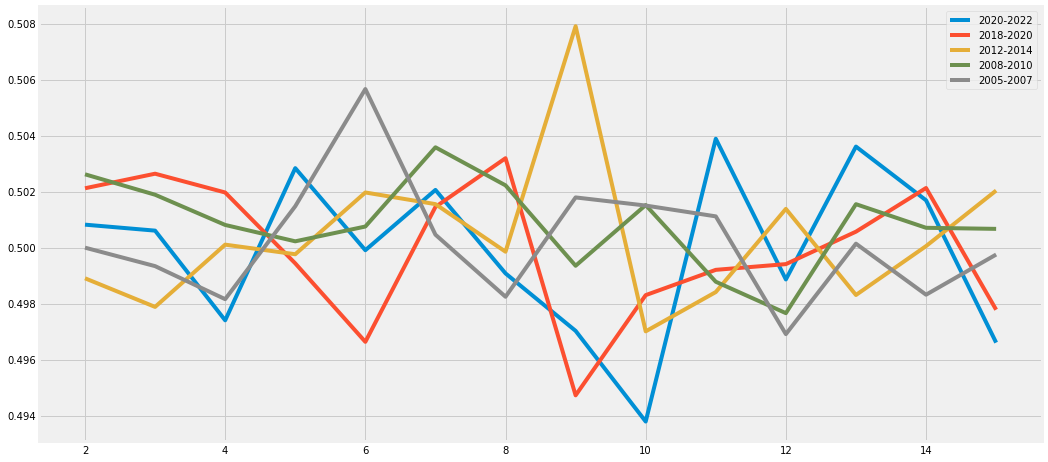

20-22 mean:0.4998719954827674, std:0.0028280142400084157
18-20 mean:0.4999707500203311, std:0.002401853826148755
12-14 mean:0.5003691935829939, std:0.002579365645108267
08-10 mean:0.5008832746007073, std:0.0015036970457421284
05-07 mean:0.5002069944341772, std:0.00206984588221931


In [404]:
# Plot the Results

# Random
plt.figure(figsize=(16,8))
plt.plot(np.arange(2,16),random_timed_tester[0],label='2020-2022')
plt.plot(np.arange(2,16),random_timed_tester[1],label='2018-2020')
plt.plot(np.arange(2,16),random_timed_tester[2],label='2012-2014')
plt.plot(np.arange(2,16),random_timed_tester[3],label='2008-2010')
plt.plot(np.arange(2,16),random_timed_tester[4],label='2005-2007')
plt.legend()
plt.show()
print(f'20-22 mean:{np.mean(random_timed_tester[0])}, std:{np.std(random_timed_tester[0])}')
print(f'18-20 mean:{np.mean(random_timed_tester[1])}, std:{np.std(random_timed_tester[1])}')
print(f'12-14 mean:{np.mean(random_timed_tester[2])}, std:{np.std(random_timed_tester[2])}')
print(f'08-10 mean:{np.mean(random_timed_tester[3])}, std:{np.std(random_timed_tester[3])}')
print(f'05-07 mean:{np.mean(random_timed_tester[4])}, std:{np.std(random_timed_tester[4])}')

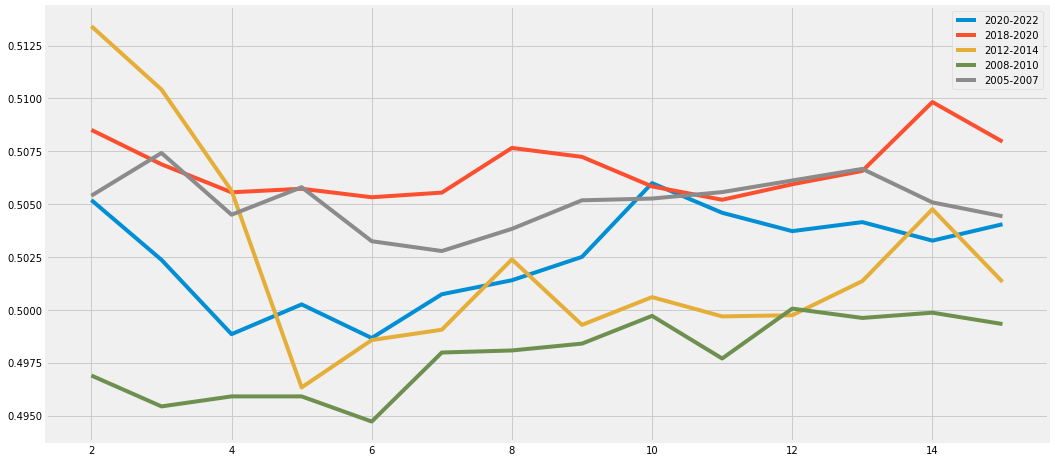

20-22 mean:0.5025538089683049, std:0.0022102398232573413
18-20 mean:0.5066992664713607, std:0.001334361831999567
12-14 mean:0.5023276468393583, std:0.004581624384583995
08-10 mean:0.49782844462127096, std:0.0017371647075386028
05-07 mean:0.5050918861057727, std:0.001223011421328233


In [403]:
# My Errors
plt.figure(figsize=(16,8))
plt.plot(np.arange(2,16),my_timed_tester[0],label='2020-2022')
plt.plot(np.arange(2,16),my_timed_tester[1],label='2018-2020')
plt.plot(np.arange(2,16),my_timed_tester[2],label='2012-2014')
plt.plot(np.arange(2,16),my_timed_tester[3],label='2008-2010')
plt.plot(np.arange(2,16),my_timed_tester[4],label='2005-2007')
plt.legend()
plt.show()
print(f'20-22 mean:{np.mean(my_timed_tester[0])}, std:{np.std(my_timed_tester[0])}')
print(f'18-20 mean:{np.mean(my_timed_tester[1])}, std:{np.std(my_timed_tester[1])}')
print(f'12-14 mean:{np.mean(my_timed_tester[2])}, std:{np.std(my_timed_tester[2])}')
print(f'08-10 mean:{np.mean(my_timed_tester[3])}, std:{np.std(my_timed_tester[3])}')
print(f'05-07 mean:{np.mean(my_timed_tester[4])}, std:{np.std(my_timed_tester[4])}')

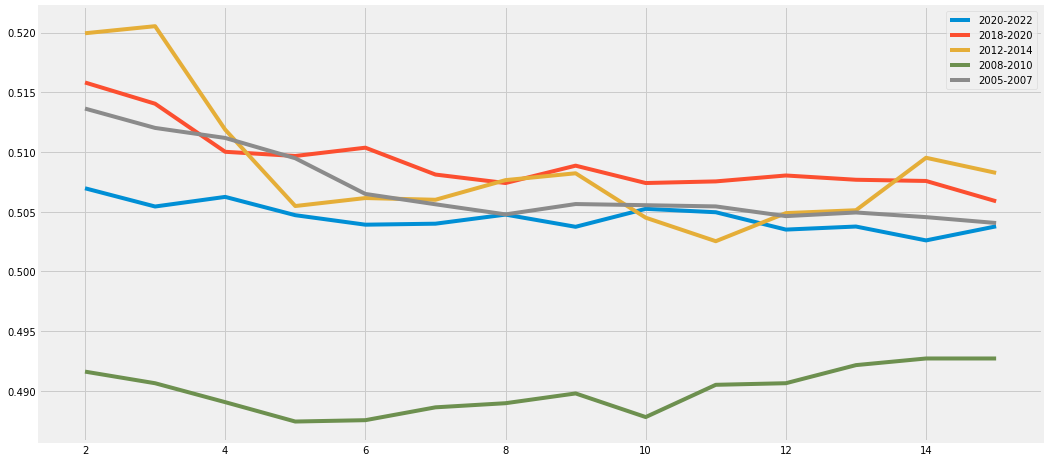

20-22 mean:0.5045450650468079, std:0.0011238903002988073
18-20 mean:0.5091729005229423, std:0.0026379709743068903
12-14 mean:0.5086199628667334, std:0.0052503738916879145
08-10 mean:0.49001533572397543, std:0.0017802511317488367
05-07 mean:0.5070025704034824, std:0.0030573229273886454


In [265]:
# Simple Model Errors
plt.figure(figsize=(16,8))
plt.plot(np.arange(2,16),simple_timed_tester[0],label='2020-2022')
plt.plot(np.arange(2,16),simple_timed_tester[1],label='2018-2020')
plt.plot(np.arange(2,16),simple_timed_tester[2],label='2012-2014')
plt.plot(np.arange(2,16),simple_timed_tester[3],label='2008-2010')
plt.plot(np.arange(2,16),simple_timed_tester[4],label='2005-2007')
plt.legend()
plt.show()
print(f'20-22 mean:{np.mean(simple_timed_tester[0])}, std:{np.std(simple_timed_tester[0])}')
print(f'18-20 mean:{np.mean(simple_timed_tester[1])}, std:{np.std(simple_timed_tester[1])}')
print(f'12-14 mean:{np.mean(simple_timed_tester[2])}, std:{np.std(simple_timed_tester[2])}')
print(f'08-10 mean:{np.mean(simple_timed_tester[3])}, std:{np.std(simple_timed_tester[3])}')
print(f'05-07 mean:{np.mean(simple_timed_tester[4])}, std:{np.std(simple_timed_tester[4])}')

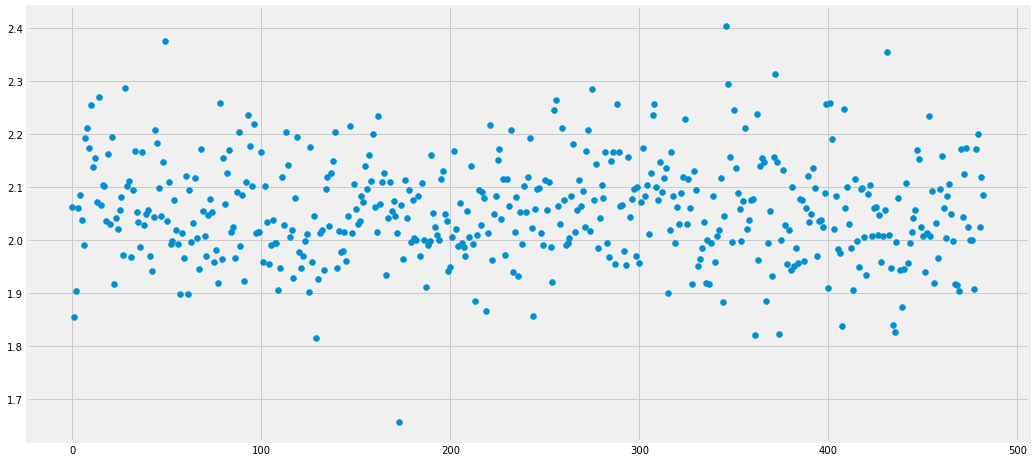

In [113]:
# Durbin Watson Test for Autocorrelation
# log returs are being tested

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

DB_Score = []
dct = dct20_22

# data_prep method demands correlation be established outside of it
symbols = list(dct.keys())
merged_dataframe = pd.concat(dct,axis=1)
close_data_frame = merged_dataframe.loc[:,merged_dataframe.columns.get_level_values(1).isin(['Close'])]
close_data_frame.columns = close_data_frame.columns.droplevel(1)
logreturn_dataframe = np.log(close_data_frame.pct_change() + 1)
corr_dataframe = logreturn_dataframe.corr()

for i in dct20_22.keys():
    data,lagnames = data_prep(i,5)
    """
    Code for Durbin Watson test
    """
    df = pd.DataFrame(data,columns=['Date',f'returns{i}'])

    X =np.arange(len(df[[f'returns{i}']]))
    Y = np.asarray(df[[f'returns{i}']])
    X = sm.add_constant(X)

    # Fit the ordinary least square method
    ols_res = OLS(Y,X).fit()
    # apply durbin watson statistic on the ols residual
    DB_Score.append(durbin_watson(ols_res.resid))
    
# Plot results
plt.figure(figsize=(16,8))
plt.scatter(np.arange(len(DB_Score)),DB_Score)
plt.show()

In [70]:
keys = []

for i in tester_dictionary.keys():
    keys.append(i)

In [198]:
# Testing how many times do the models outperform each other and the stock

victory_over_simple = []
victory_over_baseline = []
simple_victory_over_baseline = []
my_performances = []
simple_performances = []
baseline = []

for key in keys:
    for i,j,k,x,y,z in tester_dictionary[key]:
        my_performances.append(z)
        simple_performances.append(y)
        baseline.append(x)
        
        if y > x:
            simple_victory_over_baseline.append((key,i,y))
        if z > y:
            victory_over_simple.append((key,i,z))
        if z > x:
            victory_over_baseline.append((key,i,z))
        else:
            continue

In [76]:
len(my_performances)

31220

In [199]:
# How many times does my model outperform the simple model
len(victory_over_simple)/31220

0.4931454196028187

In [200]:
# How many times does the simple model outperform the stock at the end of the testing period
len(simple_victory_over_baseline)/31220

0.33212684176809737

In [201]:
# How many times does my model outperform the stock at the end of the testing period
len(victory_over_baseline)/31220

0.32126841768097375

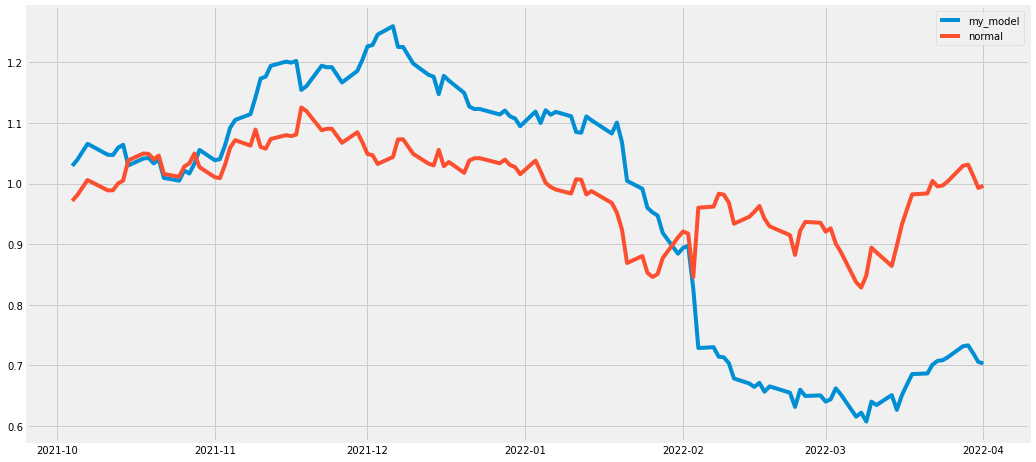

In [450]:
# Inconsistent Success- Appendix 10.3.1

dct = dct20_22
a,b,c,d = mymodel('AMZN',lags=2,plot=True)

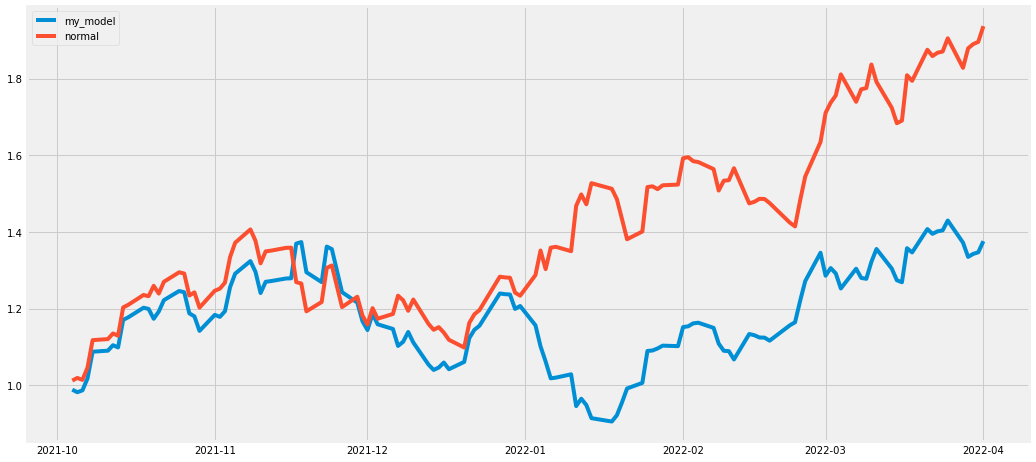

In [451]:
# Consistent Success - Appendix 10.3.2

dct = dct20_22
a,b,c,d = mymodel('APA',lags=2,plot=True)

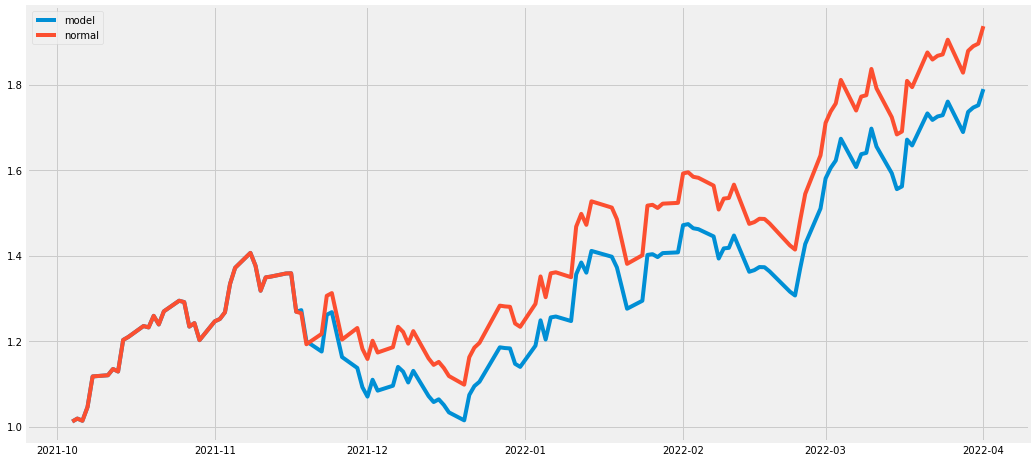

In [453]:
# Simple model Underperforming - Appendix 10.3.3

dct = dct20_22
a,b,c,d = simplemodel('APA',lags=2,plot=True)

In [230]:
# Testing how many times do the models outperform each other across all time periods

my_overall_better = []
simple_overall_better = []

better = []

for i in range(1,6):
    lag_better = []
    for n in range(2,16):
    
        meme = pd.DataFrame(data=tester_dictionary[f'{i}_{n}'],columns =['a','b','c','d','e','f'])
        simple_overall = meme['e'].sum()/482
        my_overall = meme['f'].sum()/482
        baseline_overall = meme['d'].sum()/482
        print(simple_overall,my_overall,baseline_overall,my_overall-simple_overall) # testing if the code works
        
        if my_overall-simple_overall > 0:
            my_overall_better.append(my_overall-simple_overall)
        if my_overall-simple_overall < 0:
            simple_overall_better.append(my_overall-simple_overall)
        
        lag_better.append((simple_overall,my_overall,baseline_overall))
        
    better.append(lag_better)
    print('--------')

1.0357726513500523 1.0408979796637985 1.0540206506417502 0.005125328313746236
1.0379159719759115 1.045984409773557 1.0540206506417502 0.008068437797645434
1.0412677016551954 1.0210173252512507 1.0540206506417502 -0.02025037640394478
1.0370597840503593 1.0273473331453553 1.0592094150341755 -0.009712450905003944
1.033744336203565 1.0216166935528095 1.0592094150341755 -0.012127642650755499
1.0284723005634369 1.0240123864163375 1.0592094150341755 -0.004459914147099342
1.0251448108849757 1.0246735467470944 1.0592094150341755 -0.0004712641378812332
1.0242999353957265 1.0247211554707265 1.0513179260267886 0.00042122007500000613
1.0316854073978063 1.0463845083899561 1.0513179260267886 0.014699100992149772
1.0415083278361421 1.0412896343461286 1.0513179260267886 -0.00021869349001346627
1.0349423920136334 1.0401221981284101 1.0513179260267886 0.005179806114776753
1.032697291722256 1.0378267188999242 1.0505786321033022 0.005129427177668067
1.038441282830475 1.036517325640853 1.0505786321033022 -0

In [268]:
len(my_overall_better)/70

0.4714285714285714

In [269]:
len(simple_overall_better)/70

0.5285714285714286

In [467]:
# Qualitative Analysis

lst = ['Simple LR','My model','Stock performance']

df2022 = pd.DataFrame(data=better[0],columns=lst)
df1820 = pd.DataFrame(data=better[1],columns=lst)
df1214 = pd.DataFrame(data=better[2],columns=lst)
df0810 = pd.DataFrame(data=better[3],columns=lst)
df0507 = pd.DataFrame(data=better[4],columns=lst)

df2022['Stock performance']=df2022['Stock performance'].mean()
df1820['Stock performance']=df1820['Stock performance'].mean()
df1214['Stock performance']=df1214['Stock performance'].mean()
df0810['Stock performance']=df0810['Stock performance'].mean()
df0507['Stock performance']=df0507['Stock performance'].mean()

df2022['Index'] = [i for i in range(2,16)]
df2022=df2022.set_index('Index')
df1820['Index'] = [i for i in range(2,16)]
df1820=df1820.set_index('Index')
df1214['Index'] = [i for i in range(2,16)]
df1214=df1214.set_index('Index')
df0810['Index'] = [i for i in range(2,16)]
df0810=df0810.set_index('Index')
df0507['Index'] = [i for i in range(2,16)]
df0507=df0507.set_index('Index')

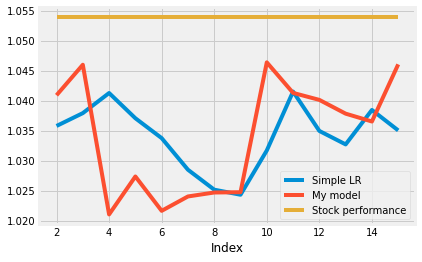

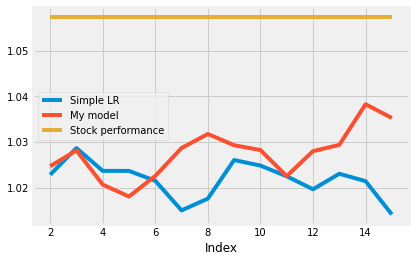

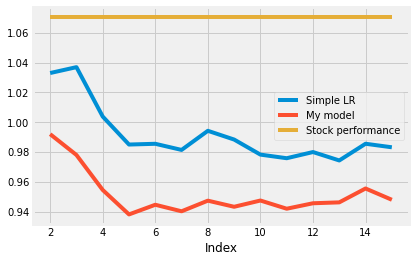

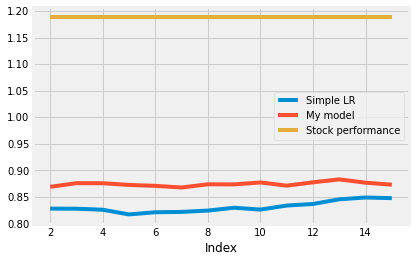

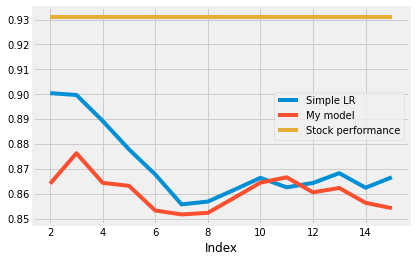

In [469]:
df2022.plot()
plt.legend()
plt.show()

df1820.plot()
plt.legend()
plt.show()

df1214.plot()
plt.legend()
plt.show()

df0810.plot()
plt.legend()
plt.show()

df0507.plot()
plt.legend()
plt.show()